<a href="https://colab.research.google.com/github/chakrateja70/Classifying-movie-reviews/blob/main/classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading the IMDB dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [3]:
#Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
#The model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
#Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
#configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
#Using custom losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
#Training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5397 - binary_accuracy: 0.7663 - val_loss: 0.4503 - val_binary_accuracy: 0.8055
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3377 - binary_accuracy: 0.8911 - val_loss: 0.3240 - val_binary_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2544 - binary_accuracy: 0.9151 - val_loss: 0.2873 - val_binary_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2066 - binary_accuracy: 0.9307 - val_loss: 0.2945 - val_binary_accuracy: 0.8797
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1731 - binary_accuracy: 0.9436 - val_loss: 0.2811 - val_binary_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1502 - binary_accuracy: 0.9500 - val_loss: 0.2819 - val_binary_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - los

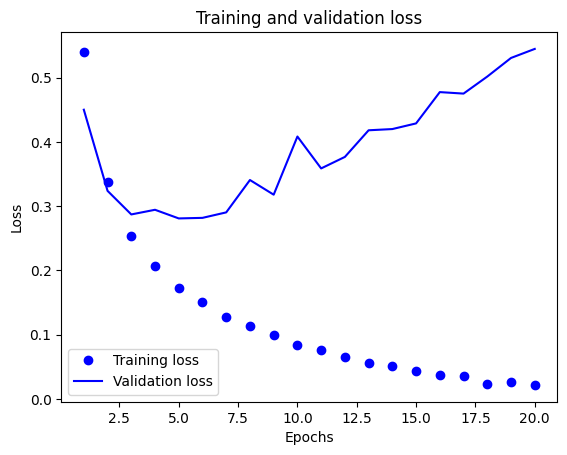

In [14]:
#plotting the training and validation loss
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

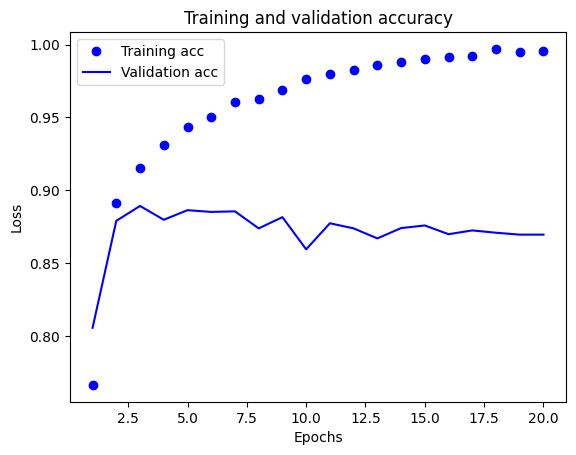

In [15]:
#plotting the training and validation accuracy
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 35ms/step - loss: 0.4650 - accuracy: 0.8121
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2684 - accuracy: 0.9054
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2129 - accuracy: 0.9227
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2870 - accuracy: 0.8859
